# **Simple Linear Regression using PyTorch**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png" width="20%">

## **Import Required Libraries**

In [1]:
from google.colab import drive, userdata
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Download the data from kaggle
!kaggle datasets download -d saquib7hussain/experience-salary-dataset

Dataset URL: https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset
License(s): other
  0% 0.00/18.8k [00:00<?, ?B/s]
100% 18.8k/18.8k [00:00<00:00, 28.5MB/s]


In [3]:
# Unzip the dataset
!unzip /content/experience-salary-dataset.zip

Archive:  /content/experience-salary-dataset.zip
  inflating: Experience-Salary.csv   


In [4]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [5]:
# Read the data
data = pd.read_csv("/content/Experience-Salary.csv")
print(data.shape)
data.head()

(1000, 2)


,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [6]:
# Check the NaN values
data.isnull().sum()

,0
exp(in months),0
salary(in thousands),0


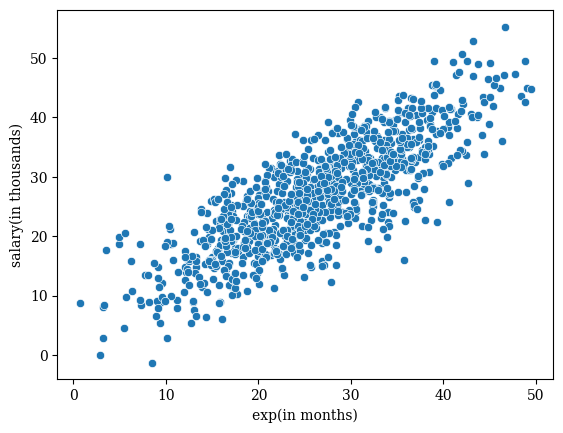

In [7]:
# Plot the data
sns.scatterplot(data=data, x="exp(in months)", y="salary(in thousands)");

## **Train-Test-Split**

In [8]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    data["exp(in months)"],
    data["salary(in thousands)"],
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape

((700,), (300,))

In [9]:
X_train, X_test = torch.tensor(X_train.to_numpy()), torch.tensor(X_test.to_numpy())
y_train, y_test = torch.tensor(y_train.to_numpy()), torch.tensor(y_test.to_numpy())

## **Build the Model using PyTorch**

In [10]:
# Create a LinearRegression class
class LinearRegression(nn.Module):
    # Constructor
    def __init__(self):
        super().__init__()
        # paremeters (weight and bias)
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, X):
        return self.weight * X + self.bias

In [11]:
torch.manual_seed(42)

# Instantiate a model object
model = LinearRegression()

# Print the initial parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# Define the loss function and the optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001)

In [13]:
# Train the model
epochs = 100

# Store the epoch results
epoch_count = []
train_loss_values = []
test_loss_values = []

## Training loop
for epoch in range(epochs):

    # Set the model to training mode
    model.train()

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate the training loss
    train_loss = loss_fn(y_train, y_pred)

    # 3. Zero the gradients
    optimizer.zero_grad()

    # 4. Backward pass
    train_loss.backward()

    # 5. Perform gradient descent (update parameters)
    optimizer.step()

    ## Testing
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient calculation
        # 1. Forward pass on the test set
        test_pred = model(X_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(y_test, test_pred)

    # Append epoch and loss values (detach to avoid computation graph)
    epoch_count.append(epoch)
    train_loss_values.append(train_loss.item())  # Use .item() to get the scalar value
    test_loss_values.append(test_loss.item())    # Use .item() to get the scalar value

    # Print out epoch number and loss values
    print(f"Epoch: {epoch+1} | Train Loss: {train_loss.item():.4f} | Test Loss: {test_loss.item():.4f}")


Epoch: 1 | Train Loss: 17.7302 | Test Loss: 17.2771
Epoch: 2 | Train Loss: 17.0464 | Test Loss: 16.5947
Epoch: 3 | Train Loss: 16.3633 | Test Loss: 15.9135
Epoch: 4 | Train Loss: 15.6819 | Test Loss: 15.2333
Epoch: 5 | Train Loss: 15.0030 | Test Loss: 14.5562
Epoch: 6 | Train Loss: 14.3322 | Test Loss: 13.8823
Epoch: 7 | Train Loss: 13.6643 | Test Loss: 13.2110
Epoch: 8 | Train Loss: 12.9963 | Test Loss: 12.5442
Epoch: 9 | Train Loss: 12.3310 | Test Loss: 11.8888
Epoch: 10 | Train Loss: 11.6750 | Test Loss: 11.2521
Epoch: 11 | Train Loss: 11.0409 | Test Loss: 10.6349
Epoch: 12 | Train Loss: 10.4268 | Test Loss: 10.0247
Epoch: 13 | Train Loss: 9.8215 | Test Loss: 9.4385
Epoch: 14 | Train Loss: 9.2311 | Test Loss: 8.8715
Epoch: 15 | Train Loss: 8.6556 | Test Loss: 8.3422
Epoch: 16 | Train Loss: 8.1190 | Test Loss: 7.8399
Epoch: 17 | Train Loss: 7.6191 | Test Loss: 7.3599
Epoch: 18 | Train Loss: 7.1489 | Test Loss: 6.9255
Epoch: 19 | Train Loss: 6.7141 | Test Loss: 6.5317
Epoch: 20 | Trai

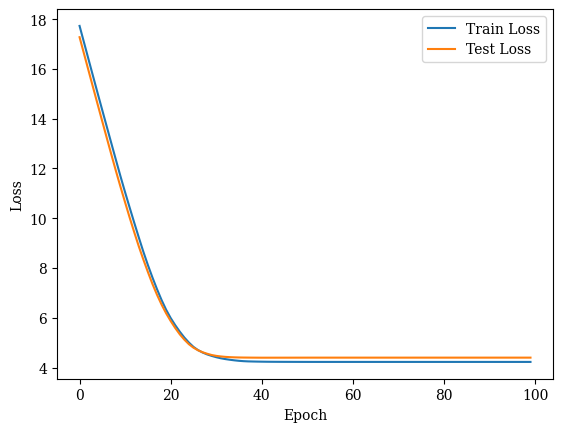

In [15]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show();

## **Plot the Regression Line**

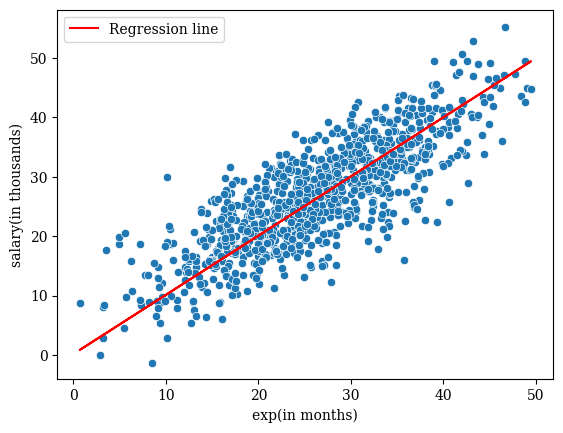

In [27]:
with torch.no_grad():
    preds = model(data.iloc[:, 0].values)

# Plot the data
sns.scatterplot(data=data, x="exp(in months)", y="salary(in thousands)")
plt.plot(data.iloc[:, 0].values, preds, c="r", label="Regression line")
plt.legend()
plt.show();

## **Save the Model**

In [29]:
torch.save(model.state_dict(), "lr_model.pth")